<a href="https://colab.research.google.com/github/nllllibeth/ML/blob/master/Lab_1_numpy_matplotlib_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание 1 (numpy + matplotlib)

---

Напишите программу, которая будет решать систему линейных уравнений вида:

\begin{matrix} a_{11}x+a_{12}y=b_{1}&(1) \\ a_{21}x+a_{22}y=b_{2} &(2) \end{matrix}
​	
* На вход программа должна принимать 2 строки (т.е. должен быть реализован ввод с клавиатуры). Каждая строка содержит 3 действительных числа через пробел: коэффициенты a и b.
* Систему уравнений необходимо решить матричным способом. Предусмотрите случаи, когда решения есть, решений нет, решений бесконечно много. Выведите ответ. Покажите решение на графике. Если решения есть, постройте график и точкой отметьте решение (если оно одно, например, функцией [`scatter`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html)).

Введите коэффициенты a11, a12, b1 через пробел: 34 56 84
Введите коэффициенты a21, a22, b2 через пробел: 23 22 86
Решение СЛАУ 
 5.496296296296297 
 -1.837037037037038


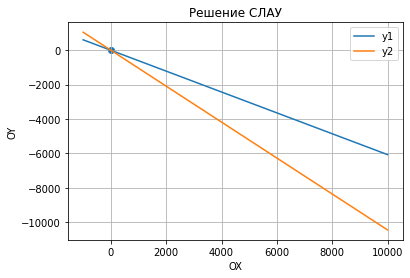

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

a = np.array([int(i) for i in input('Введите коэффициенты a11, a12, b1 через пробел: ').split()])
b = np.array([int(i) for i in input('Введите коэффициенты a21, a22, b2 через пробел: ').split()])
I = np.vstack((a, b))  # полная матрица коэффициентов
determ = a[0] * b[1] - (a[1] * b[0])  # определитель
n = 2
A = np.vstack((a[0:2], b[0:2]))  # матрица коэффициентов при неизвестных
rank1 = np.linalg. matrix_rank(A)
rank2 = np.linalg.matrix_rank(I)

a00 = a[0]
a01 = a[1]
a02 = a[2]
a10 = b[0]
a11 = b[1]
a12 = b[2]

fig = plt.figure()
ax = fig.add_axes()
plt.grid(True)
plt.title('Решение СЛАУ')
plt.xlabel('OX')
plt.ylabel('OY')

x = np.linspace(-1000, 10000, num=20)
y1 = (-a00 * x) / a01 + a02 / a01
y2 = (-a10 * x) / a11 + a12 / a11
plt.plot(x, y1, label='y1')
plt.plot(x, y2, label='y2')
plt.legend()
 
if rank1 != rank2:
    print('СЛАУ несовместна, не имеет решений')
elif n > rank1 == rank2:
    print('СЛАУ неопределенная, имеет бесконечное количество решений')
elif n == rank1 and rank1 == rank2:
    B = np.vstack((a[-1], b[-1]))  # матрица свободных
    A1 = ((-1) ** (1+1)) * A[1, 1]
    A2 = ((-1) ** (1+2)) * A[1, 0]
    A3 = ((-1) ** (2+1)) * A[0, 1]
    A4 = ((-1) ** (1+1)) * A[0, 0]
    A_add = np.array([[A1, A2], [A3, A4]])
    AT_add = A_add.T  # транспонированная союзная матрица
    A_rev = AT_add * (1/determ)
    X = A_rev.dot(B)
    x1 = float(X[0])
    x2 = float(X[1])
    print("Решение СЛАУ", '\n', x1, '\n', x2)
    plt.scatter(x1, x2)
    plt.show()
    

# Задание 2 (pytorch + matplotlib)

Пусть $f(x) = \sin(x) * x$. Постройте график $f(x)$ и $\frac{df(x)}{dx}$, для расчета производных воспользуйтесь методом `backward()` и matplotlib для построения графиков.

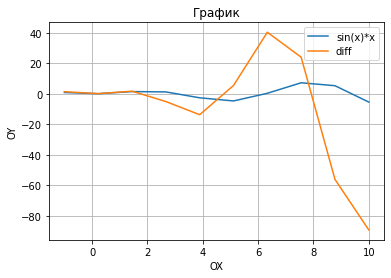

In [ ]:
# PUT YOUR CODE HERE
import matplotlib.pyplot as plt
import numpy 
import torch

x = torch.linspace(-1, 10, 10, requires_grad=True)
y = torch.sin(x) * x
y.backward(x)

fig = plt.figure()
ax = fig.add_axes()
plt.grid(True)
plt.title('График')
plt.xlabel('OX')
plt.ylabel('OY')

plt.plot(x.detach().numpy(), y.detach().numpy(), label='sin(x)*x')
plt.plot(x.detach().numpy(), x.grad.detach().numpy(), label='diff')
plt.legend()

plt.show()